In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Fri Dec 21 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.3
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.15.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [1]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
VISUAL_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'visual'))
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
EXTRA = ['age', 'sex', 'sc_bef', 'sc_aft']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
data = np.transpose(data.values)

Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.


<ipython-input-1-4691704d6700>:29: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))


In [3]:
meta_df['SEX'] = meta_df['SEX'].astype('category')
print("Women: %s " % len(meta_df['SEX'][meta_df['SEX']==0]))
print("Men: %s " % len(meta_df['SEX'][meta_df['SEX']==1]))
print("Age: \n%s" % meta_df['AGE'].describe())
print('250 Hz: %s \t 1000 Hz: %s' % (len(meta_df[meta_df['freq']==250]),len(meta_df[meta_df['freq']==1000])))

Women: 104 
Men: 29 
Age: 
count    133.000000
mean      47.706767
std        9.577263
min       30.000000
25%       39.000000
50%       49.000000
75%       55.000000
max       65.000000
Name: AGE, dtype: float64
250 Hz: 99 	 1000 Hz: 34


In [3]:
def prepare_dfs(col='lyap', kind='processed'):
    df = pd.read_pickle(os.path.join(LABELED_ROOT, kind, col, f'training_{col}.pkl')) 
    df_bef = pd.read_pickle(os.path.join(LABELED_ROOT, kind, col, f'{col}_bef.pkl'))
    df_aft = pd.read_pickle(os.path.join(LABELED_ROOT, kind, col, f'{col}_aft.pkl'))
    return df, df_bef, df_aft
    
def prepare_resp_non(col='lyap'):
    df, df_bef, df_aft = prepare_dfs(col)
    return df[df['change'] >= df.quantile(0.66)['change']], df[df['change'] <= df.quantile(0.33)['change']]

df, df_bef, df_aft = prepare_dfs('lyap')
df_resp, df_non = prepare_resp_non('lyap')
df

FP1        FP2         F3         F4         C3  \
patient trial                                                          
1       a      10.029887  11.703816   9.214353   9.940690   9.454637   
        b       8.682294  10.005590  10.394913   8.533577   8.583511   
3       a      11.491857  11.446344  11.668608  11.491566  11.875358   
        b      11.063547  11.302472  11.271126  11.381274  10.575230   
4       a      11.049518  11.246144  10.800703  11.212004  10.770177   
        b      10.757364  11.094023  10.519614  10.856012  10.200112   
5       a      10.608832  10.429371   9.958579   9.779142   9.767949   
        b      10.222496  10.364009   9.902109   9.551293   9.522670   
7       a      10.569585  10.164602  10.603027  10.453541  10.934872   
        b      11.379479  11.042357  11.379592  11.002860  11.359843   
9       a      10.462948  10.407645  10.633778  10.445797  10.052567   
        b      10.800397  10.845411  10.624771  10.652032  10.339373   
10      a       8.464631   8.587235   8.304111   8.648945   8.438431   
        b       9.381783   9.358838   8.992300   9.070511   8.996572   
11      a       9.938870  10.700517   9.982946  10.238261  10.231401   
        b       9.597677   9.999793   8.112257   9.467099   7.250574   
12      a      10.559718   8.606021   8.862489   9.546337   9.779549   
        b       7.814297   8.188641   8.665411  10.588183  10.072393   
14      a       9.574759  10.230881   9.277384  10.030223   9.738008   
        b      10.455687   9.639854   9.724015   9.776478   9.459171   
15      a      10.113879   8.980166   9.024871   8.755189   8.550213   
        b      10.213675   8.199658   9.628821   8.228489   8.485771   
16      a       9.846539  10.168192  10.563270  10.465832  11.160680   
        b      10.231329  10.399685  10.562711  10.484028  10.836115   
17      a       8.544387   8.928190   8.487922   8.528657   8.208459   
        b       8.921241   8.695206   8.810930   9.045643  10.285132   
18      a       7.132538   7.103452   6.896109   7.650140   7.509271   
        b       6.726034   6.874946   7.176765   6.694113   7.099843   
19      a      10.419511  10.409738  10.753326  11.127189  11.109778   
        b      11.177304  11.017616  10.894344  10.525374  11.226285   
...                  ...        ...        ...        ...        ...   
115     a      10.177573  10.463498  10.373667  10.284192  10.520390   
        b      10.210878  10.337421  10.198964  10.465757  10.249467   
116     a       7.578186   6.806090   8.358481   8.554304   7.985535   
        b       8.592089   7.213457   8.524504   8.473015   7.765644   
117     a       9.409438   8.855185  10.345424   9.985462   9.148281   
        b       9.151351   8.514548  10.339608  10.181550  10.225834   
119     a      10.677304  10.673568  10.311946  10.528846  10.119253   
        b      10.101010  10.864712  10.305223   9.961157  10.192525   
121     a      10.629734  10.485277  10.785476  10.822141   9.594741   
        b       7.236057   9.101107   9.673147  10.426984  10.405070   
122     a       9.499462  11.296125   9.031831  11.727797  11.066806   
        b       9.605622  11.644169  10.744784  11.550937  11.453431   
123     a      10.584845  11.341327  11.253140  11.454313  10.748692   
        b       9.275467   9.925772   8.176311   7.202035   8.525424   
124     a       9.711738  10.061197   9.882326   9.801841  10.521407   
        b       9.185143   9.598477   9.021667   9.168765   9.654120   
126     a       8.926742  10.608816   9.474970   9.487009   8.818930   
        b      10.156676  11.037440  10.473964  10.823342  10.330702   
127     a      10.117673  10.394623   9.646045  10.417927  10.236393   
        b       8.861269   9.498562   9.144958   9.890549   9.491379   
129     a      10.110227  10.423039  10.306522  10.400453  10.823231   
        b       9.295682   9.270439   8.973870   8.469599   9.747949   
130     a       8.731831   8.956714   9.002172   9.214503   9

# Before and after comparison plots

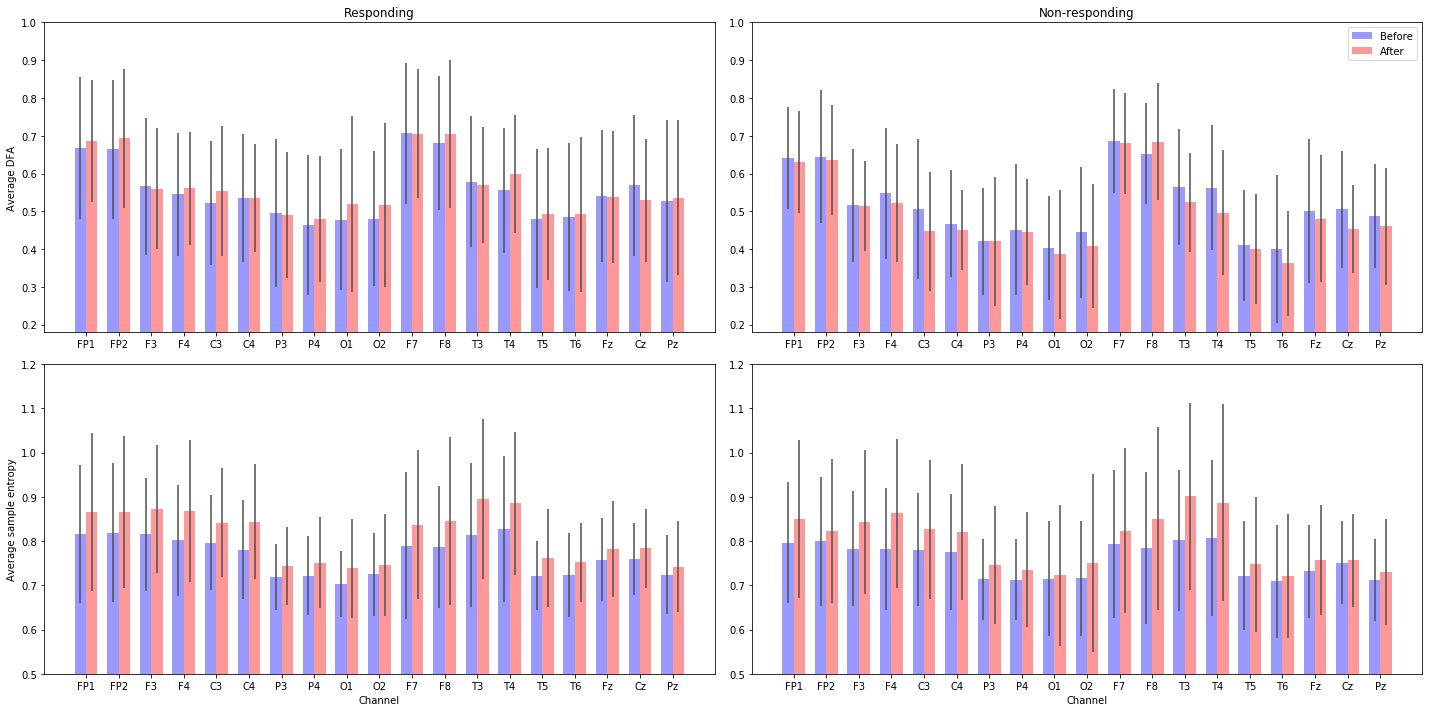

In [117]:
def plot_bars(dfa, dfb, ax):
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    index = np.arange(len(CHANNEL_NAMES))
    
    dfa = dfa[CHANNEL_NAMES]
    dfb = dfb[CHANNEL_NAMES]

    meansa = dfa.mean()
    meansb = dfb.mean()
    stda = dfa.std()
    stdb = dfb.std()

    rects1 = ax.bar(index, meansa, bar_width,
                    alpha=opacity, color='b',
                    yerr=stda, error_kw=error_config,
                    label='Before')

    rects2 = ax.bar(index + bar_width, meansb, bar_width,
                    alpha=opacity, color='r',
                    yerr=stdb, error_kw=error_config,
                    label='After')
    
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(CHANNEL_NAMES)
    
col_to_ylim = {
    'lyap': (7.5, 13), # 10 3
    # 'lyap': (4.3, 10), # auto
    'corr': (6.5, 9), # 10 3
    # 'corr': (2.3, 3.5), # auto
    'dfa':    (0.18, 1),
    'sampen': (0.5, 1.2),
}

col_to_name = {
    'lyap': '$\lambda_1$',
    'corr': '$d_2$',
    'dfa': 'DFA',
    'sampen': 'sample entropy',
}

fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex=False, sharey=False)

col = 'dfa'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

plot_bars(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :], ax[0,0])

ax[0, 0].set_title('Responding')
ax[0, 0].set_ylabel(r'Average {}'.format(col_to_name[col]))
ax[0, 0].set_ylim(col_to_ylim[col])

plot_bars(df_non.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'b'), :], ax[0,1])

ax[0, 1].set_title('Non-responding')
ax[0, 1].set_ylim(col_to_ylim[col])
ax[0, 1].legend()

col = 'sampen'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

plot_bars(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :], ax[1,0])

ax[1, 0].set_xlabel('Channel')
ax[1, 0].set_ylabel(r'Average {}'.format(col_to_name[col]))
ax[1, 0].set_ylim(col_to_ylim[col])

plot_bars(df_non.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'b'), :], ax[1,1])

ax[1, 1].set_xlabel('Channel')
ax[1, 1].set_ylim(col_to_ylim[col])

fig.tight_layout()
# fig.savefig('/home/miroslav/Documents/DP/Images/bars/resp_non2.png')
plt.show()

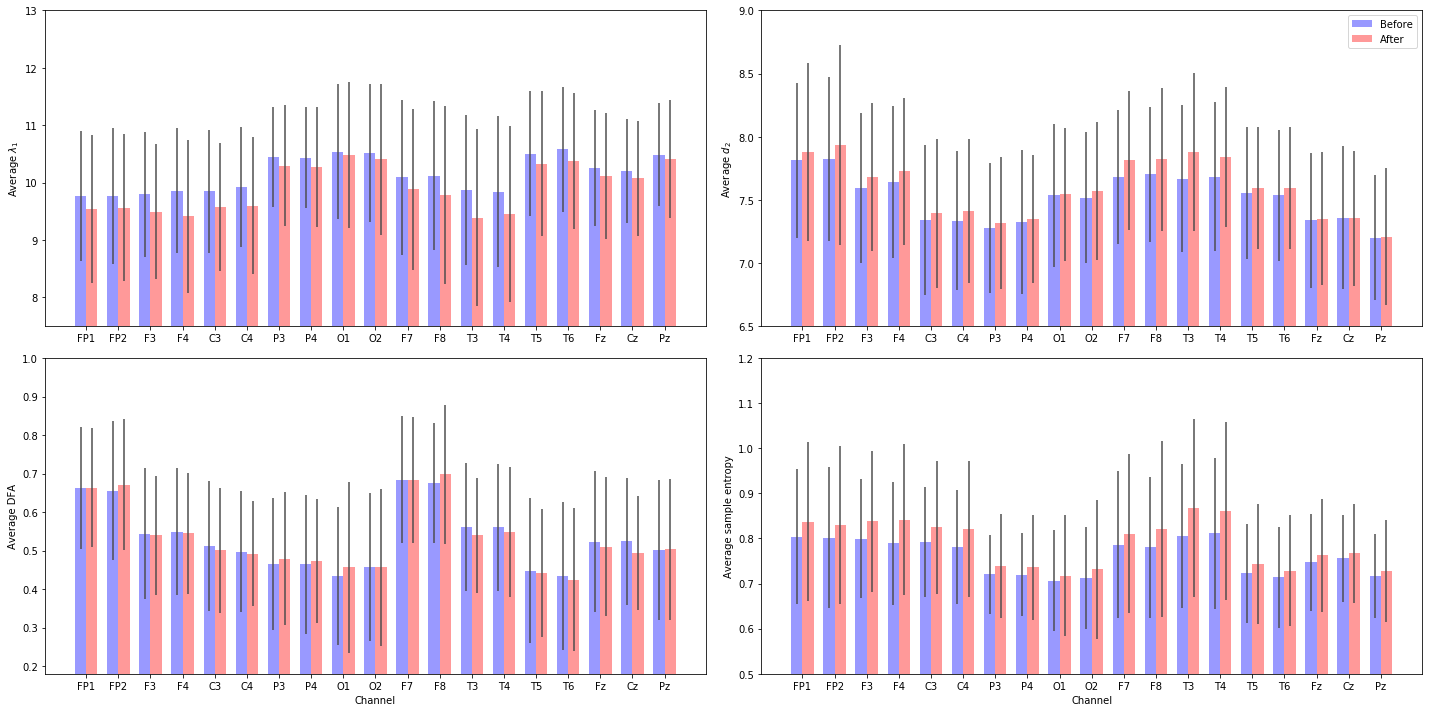

In [157]:
fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex=False, sharey=False)

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)

plot_bars(df_bef, df_aft, ax[0,0])

# ax[0, 0].set_title('Responding')
ax[0, 0].set_ylabel(r'Average {}'.format(col_to_name[col]))
ax[0, 0].set_ylim(col_to_ylim[col])

col = 'corr'
df, df_bef, df_aft = prepare_dfs(col)

plot_bars(df_bef, df_aft, ax[0,1])

# ax[0, 1].set_title('Non-responding')
ax[0, 1].set_ylabel(r'Average {}'.format(col_to_name[col]))
ax[0, 1].set_ylim(col_to_ylim[col])
ax[0, 1].legend()

col = 'dfa'
df, df_bef, df_aft = prepare_dfs(col)

plot_bars(df_bef, df_aft, ax[1,0])

ax[1, 0].set_xlabel('Channel')
ax[1, 0].set_ylabel(r'Average {}'.format(col_to_name[col]))
ax[1, 0].set_ylim(col_to_ylim[col])

col = 'sampen'
df, df_bef, df_aft = prepare_dfs(col)

plot_bars(df_bef, df_aft, ax[1,1])

ax[1, 1].set_xlabel('Channel')
ax[1, 1].set_ylabel(r'Average {}'.format(col_to_name[col]))
ax[1, 1].set_ylim(col_to_ylim[col])

fig.tight_layout()
fig.savefig('/home/miroslav/Documents/DP/Images/bars/bef_aft.png')
plt.show()

# Before and after K-S test

In [7]:
from scipy.stats import ks_2samp, kruskal

def print_res(name, res, mean1=0, mean2=0, std1=0, std2=0):
    if res.pvalue <= 0.01:
        m = '***'
    elif res.pvalue <= 0.02:
        m = '**'
    elif res.pvalue <= 0.05:
        m = '*'
    else:
        m = ''
    print('{: <8} & {: <5.3f} $\pm$ {:<5.3f} & {: <5.3f} $\pm$ {: <5.3f} & {: <5.3f} & {: <5} \\\\ \hline'.format(name, mean1, std1,  mean2, std2,res.pvalue, m))

def channel_wise_ks(df_bef, df_aft):
    dfa = df_bef[CHANNEL_NAMES].mean(axis=1)
    dfb = df_aft[CHANNEL_NAMES].mean(axis=1)
    print_res('mean', kruskal(dfa, dfb), dfa.mean(), dfb.mean(), dfa.std(), dfb.std())
    dfa = df_bef[CHANNEL_NAMES].std(axis=1)
    dfb = df_aft[CHANNEL_NAMES].std(axis=1)
    print_res('std', kruskal(dfa, dfb), dfa.mean(), dfb.mean(), dfa.std(), dfb.std())
    for col in CHANNEL_NAMES:
        print_res(col, kruskal(df_bef[col], df_aft[col]), df_bef[col].mean(), df_aft[col].mean(), df_bef[col].std(), df_aft[col].std())
        

for col in ['lyap', 'corr', 'sampen', 'dfa']:
    df, df_bef, df_aft = prepare_dfs(col)
    df_resp, df_non = prepare_resp_non(col)
    print('\n\n\n' + col.upper())
    print('All before/after treatment: {} / {}'.format(len(df_bef), len(df_aft)))
    channel_wise_ks(df_bef, df_aft)
    # print('\nResponding before/after treatment: {} / {}'.format(len(df_resp.loc[(slice(None), 'a'), :]), len(df_resp.loc[(slice(None), 'b'), :])))
    # channel_wise_ks(df_resp.loc[(slice(None), 'a'), :] , df_resp.loc[(slice(None), 'b'), :])
    # print('\nNon-responding before/after treatment: {} / {}'.format(len(df_non.loc[(slice(None), 'a'), :]), len(df_non.loc[(slice(None), 'b'), :])))
    # channel_wise_ks(df_non.loc[(slice(None), 'a'), :] , df_non.loc[(slice(None), 'b'), :])
    # print('\nResponding/Nonresponding all: {} / {}'.format(len(df_resp), len(df_non)))
    # channel_wise_ks(df_resp, df_non)
    # print('\nResponding/Nonresponding before treatment: {} / {}'.format(len(df_resp.loc[(slice(None), 'a'), :]), len(df_non.loc[(slice(None), 'a'), :])))
    # channel_wise_ks(df_resp.loc[(slice(None), 'a'), :] , df_non.loc[(slice(None), 'a'), :])
    # print('\nResponding/Nonresponding after treatment: {} / {}'.format(len(df_resp.loc[(slice(None), 'b'), :]), len(df_non.loc[(slice(None), 'b'), :])))
    # channel_wise_ks(df_resp.loc[(slice(None), 'b'), :] , df_non.loc[(slice(None), 'b'), :])

# print('*** LOW / HIGH DEPRESSION SCORE ***')
# for col in ['lyap', 'corr', 'sampen', 'dfa']:
#     df, df_bef, df_aft = prepare_dfs(col)
#     print(col.upper())
#     low = df[df['sc'] <= df.quantile(0.33)['sc']]
#     high = df[df['sc'] >= df.quantile(0.66)['sc']]
#     channel_wise_ks(low, high)
#     print()
#     
# print('*** RESPONDING / NON-RESPONDING - terciles ***')
# for col in ['lyap', 'corr', 'sampen', 'dfa']:
#     df_resp, df_non = prepare_resp_non(col)
#     print(col.upper())
#     print(len(df_resp.loc[(slice(None), 'a'), :]))
#     print(len(df_non.loc[(slice(None), 'a'), :]))
#     print(len(df_resp.loc[(slice(None), 'b'), :]))
#     print(len(df_non.loc[(slice(None), 'b'), :]))
#     print('resp/nonresp before treatment')
#     channel_wise_ks(df_resp.loc[(slice(None), 'a'), :] , df_non.loc[(slice(None), 'a'), :])
#     print('resp/nonresp after treatment')
#     channel_wise_ks(df_resp.loc[(slice(None), 'b'), :] , df_non.loc[(slice(None), 'b'), :])




LYAP
All before/after treatment: 110 / 110
mean     & 10.245 $\pm$ 0.906 & 9.976 $\pm$ 1.015 & 0.064 &       \\ \hline
std      & 0.617 $\pm$ 0.239 & 0.703 $\pm$ 0.303 & 0.047 & *     \\ \hline
FP1      & 9.845 $\pm$ 1.129 & 9.593 $\pm$ 1.258 & 0.181 &       \\ \hline
FP2      & 9.877 $\pm$ 1.184 & 9.645 $\pm$ 1.291 & 0.223 &       \\ \hline
F3       & 9.853 $\pm$ 1.021 & 9.509 $\pm$ 1.124 & 0.042 & *     \\ \hline
F4       & 9.994 $\pm$ 1.082 & 9.491 $\pm$ 1.272 & 0.004 & ***   \\ \hline
C3       & 9.931 $\pm$ 1.010 & 9.612 $\pm$ 1.080 & 0.032 & *     \\ \hline
C4       & 10.027 $\pm$ 1.017 & 9.675 $\pm$ 1.142 & 0.019 & **    \\ \hline
P3       & 10.516 $\pm$ 0.816 & 10.343 $\pm$ 0.931 & 0.262 &       \\ \hline
P4       & 10.536 $\pm$ 0.835 & 10.336 $\pm$ 0.975 & 0.257 &       \\ \hline
O1       & 10.664 $\pm$ 1.067 & 10.557 $\pm$ 1.164 & 0.576 &       \\ \hline
O2       & 10.617 $\pm$ 1.076 & 10.438 $\pm$ 1.231 & 0.266 &       \\ \hline
F7       & 10.164 $\pm$ 1.361 & 9.908 $\pm$ 

# PCA

<IPython.core.display.Javascript object>


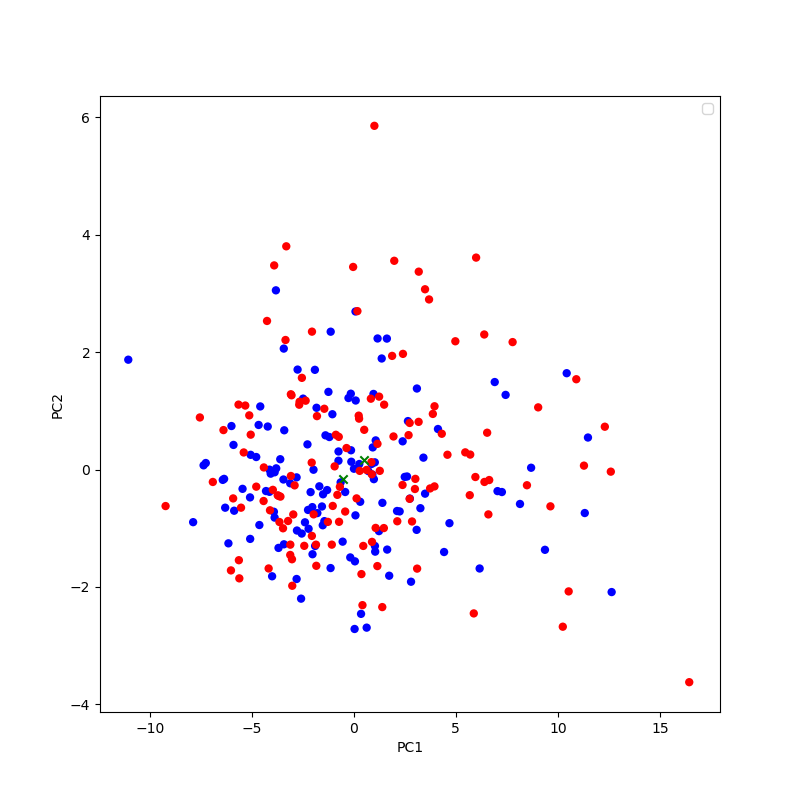

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


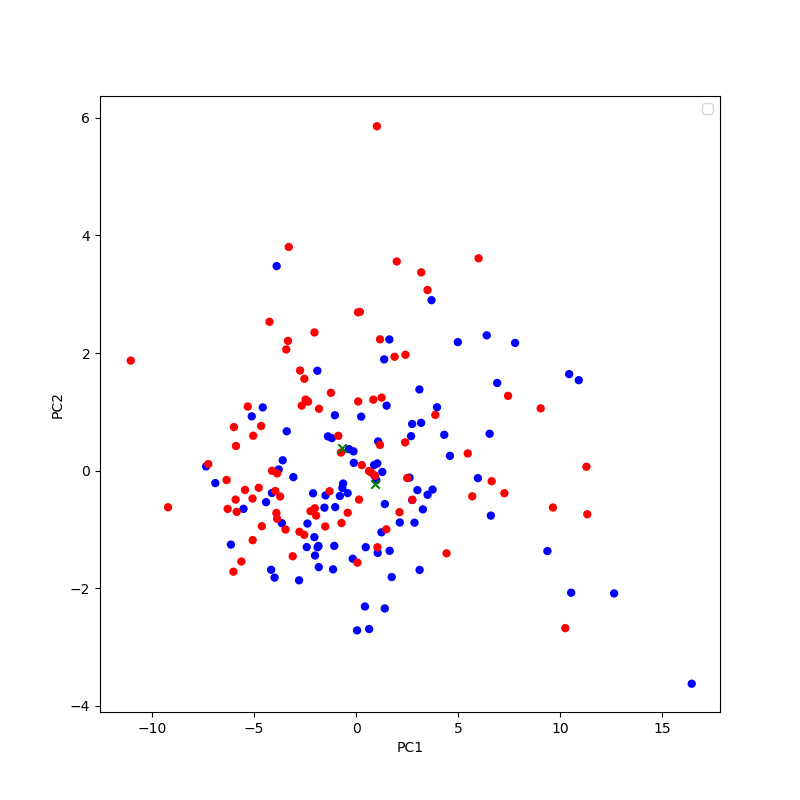

No handles with labels found to put in legend.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

def plot_pca_2d(df_first, df_second=None, c1='blue', c2='red', title=""):
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    fig = plt.figure(figsize=(8,8))
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.scatter(first[:,0], first[:,1], c=c1, cmap='Blues', edgecolors='', label='')
    plt.scatter(np.average(first[:,0]), np.average(first[:,1]), c='g', marker='x')
    if second is not None:
        plt.scatter(second[:,0], second[:,1], c=c2, cmap='Reds', edgecolors='', label='')
        plt.scatter(np.average(second[:,0]), np.average(second[:,1]), c='g', marker='x')
    # plt.title(title)
    plt.legend()
    # plt.colorbar()
    plt.show()

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)
pca = decomposition.PCA(n_components=2)
pca.fit(df[CHANNEL_NAMES])

plot_pca_2d(df_bef, df_aft, title="Before / After")
# plot_pca_2d(df, None, c1=df['change'], title="Change in score")
# plot_pca_2d(df_bef, None, c1=df_bef['sc_bef'], title="")
# plot_pca_2d(df_aft, None, c1=df_aft['sc_aft'], title="")
# plot_pca_2d(df_aft[df_aft['sc_aft'] > 27], c1='red', title="")
# plot_pca_2d(df_bef[df_bef['sc_bef'] > 30], title="")
# plot_pca_2d(df[(df['sc']>30) & (df['sc']>30)], df[(df['sc'] < 20) & (df['sc'] < 20)], title="Depressed / Non-depressed")
# plot_pca_2d(df[df['sc'] <= 10], df[df['sc'] >= 30], title='Depressed / Not Depressed')
plot_pca_2d(df_resp, df_non, title='Resp / Non')

<IPython.core.display.Javascript object>


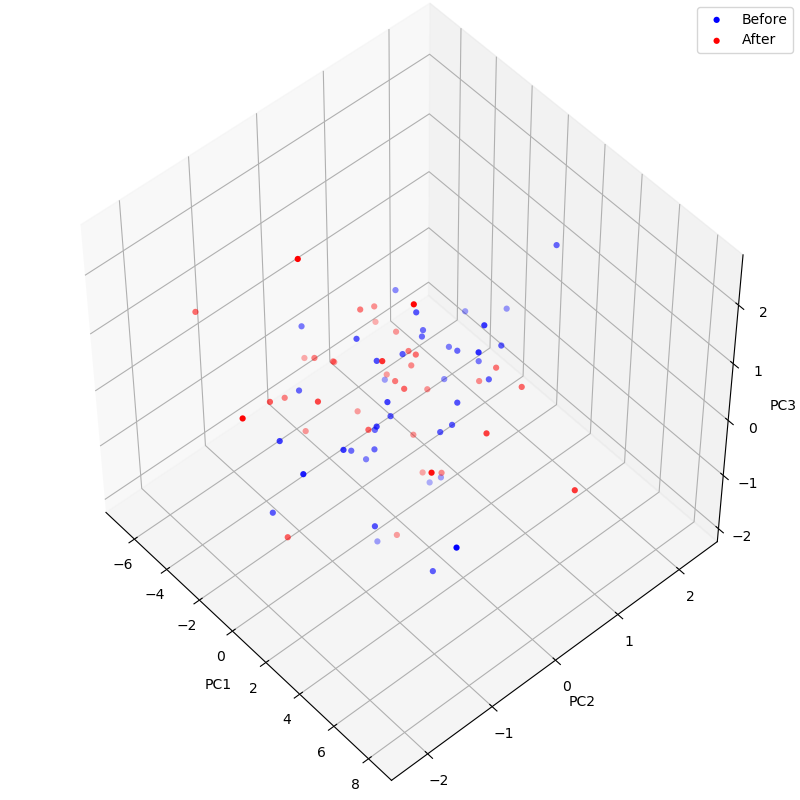

In [249]:
def plot_pca_3d(df_first, df_second=None, c1='blue', c2='red', title="", clus=False):
    pca = decomposition.PCA(n_components=3)
    pca.fit(df_first.append(df_second)[CHANNEL_NAMES])
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    if clus:
        clus_bef = df_first.iloc[(-4 < first[:,0]) & (first[:,0] < -2) & (first[:,1] < 1) & (0 < first[:,1]) & (abs(first[:,2]) < 1), :][EXTRA]
        clus_aft = df_second.iloc[(-4 < second[:,0]) & (second[:,0] < -2) & (second[:,1] < 1) & (0 < second[:,1]) & (abs(second[:,2]) < 1), :][EXTRA]
        overlap = clus_bef.join(clus_aft, how='inner', lsuffix='', rsuffix='_a')
        print(clus_bef)
        print(clus_aft)
        print(overlap.loc[:, ['age', 'sex', 'sc_bef', 'sc_aft']])
        
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.scatter(first[:,0], first[:,1], first[:,2], c=c1, cmap='Blues', edgecolor='', label='Before')
    if second is not None:
        ax.scatter(second[:,0], second[:,1], second[:,2], c=c2, cmap='Reds', edgecolor='', label='After')
    # plt.title(title)
    plt.legend()
    plt.show()

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

# plot_pca_3d(df_bef, df_aft, df_bef['age'], df_aft['age'])
# plot_pca_3d(df_bef, df_aft, title="Before / After")
# plot_pca_3d(df[df['sex']==0], df[df['sex']==1], title="Men / Women") # Men corr cluster
# plot_pca_3d(df_bef, df_aft, df_bef['sc_bef'], df_aft['sc_aft'], title="Scores bef / aft")
plot_pca_3d(df_resp.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'a'), :], title='Resp / Non')

<IPython.core.display.Javascript object>


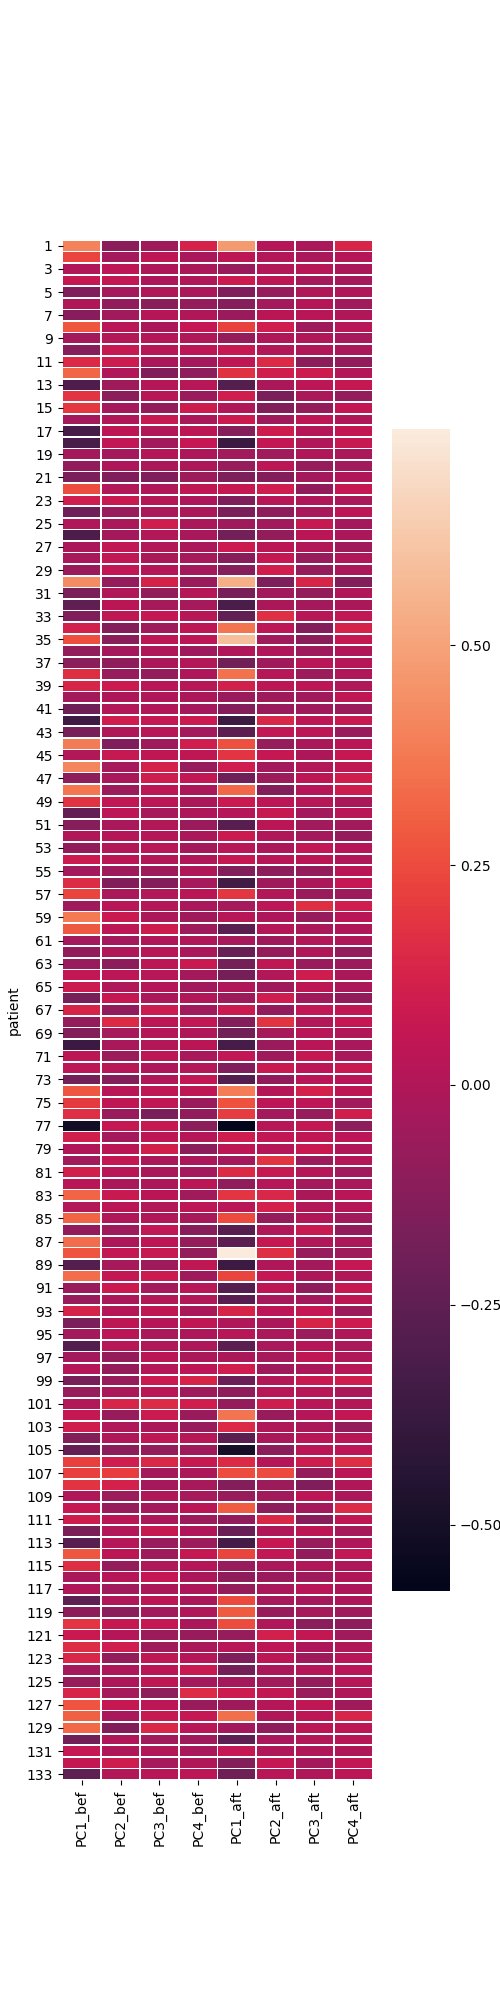

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

def plot_heatmap(df_bef=df_bef, df_aft=df_aft, n=3, title='All'):

    pca = decomposition.PCA(n_components=4)
    pca.fit(df[CHANNEL_NAMES])
    bef_proj_df = pd.DataFrame(pca.transform(df_bef[CHANNEL_NAMES]), index=df_bef.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
    aft_proj_df = pd.DataFrame(pca.transform(df_aft[CHANNEL_NAMES]), index=df_aft.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])

    joined_df = bef_proj_df.join(aft_proj_df, lsuffix='_bef', rsuffix='_aft')

    plt.figure(figsize=(5, 20))
    ax = sns.heatmap(joined_df, linewidth=0.5)
    # plt.title(": ".join((measure, title)))
    plt.show()
    # plt.savefig(os.path.join(VISUAL_ROOT, "heatmaps", _".join((measure, title))+'.png'))

# for measure in ('lyap', 'corr', 'sampen'):
for measure in ('higu',):
    df, df_bef, df_aft = prepare_dfs(measure)
    plot_heatmap()
    # plot_heatmap(df_bef[df_bef['sex']==0], df_aft[df_aft['sex']==0], title='Women')
    # plot_heatmap(df_bef[df_bef['sex']==1], df_aft[df_aft['sex']==1], title='Men')
    # plot_heatmap(df_bef[df_bef['age']>50], df_aft[df_aft['age']>50], title='Age >= 50')
    # plot_heatmap(df_bef[df_bef['age']<=30], df_aft[df_aft['age']<=30], title='Age <= 30')
    # plot_heatmap(df_bef[df_bef['label_r']==1], df_aft[df_aft['label_r']==1], title='Responding')
    # plot_heatmap(df_bef[df_bef['label_r']==0], df_aft[df_aft['label_r']==0], title='Non-responding')
    # plot_heatmap(df_bef[df_bef['sc_bef']<25], df_aft[df_aft['sc_bef']<25], title='Score before < 25')
    # plot_heatmap(df_bef[df_bef['sc_bef']>=30], df_aft[df_aft['sc_bef']>=30], title='Score before >= 25')
    # plot_heatmap(df_aft[df_aft['sc_aft']<25], df_aft[df_aft['sc_aft']<25], title='Score after < 25')
    # plot_heatmap(df_aft[df_aft['sc_aft']>=30], df_aft[df_aft['sc_aft']>=30], title='Score after >= 25')
    

# Other ideas

<IPython.core.display.Javascript object>


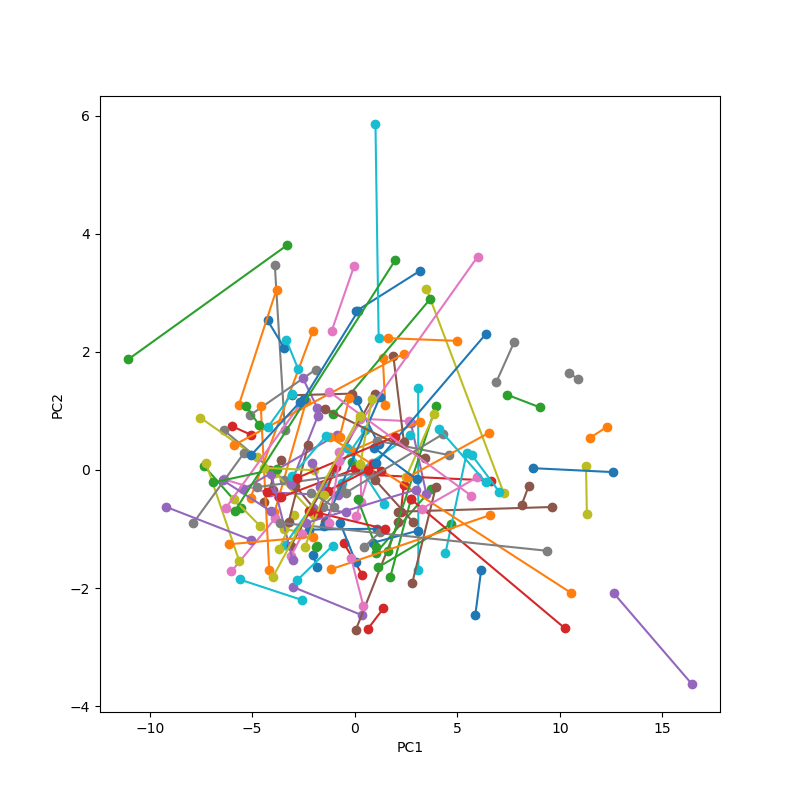

MEAN DISTANCE: 2.8144559169738903


<IPython.core.display.Javascript object>


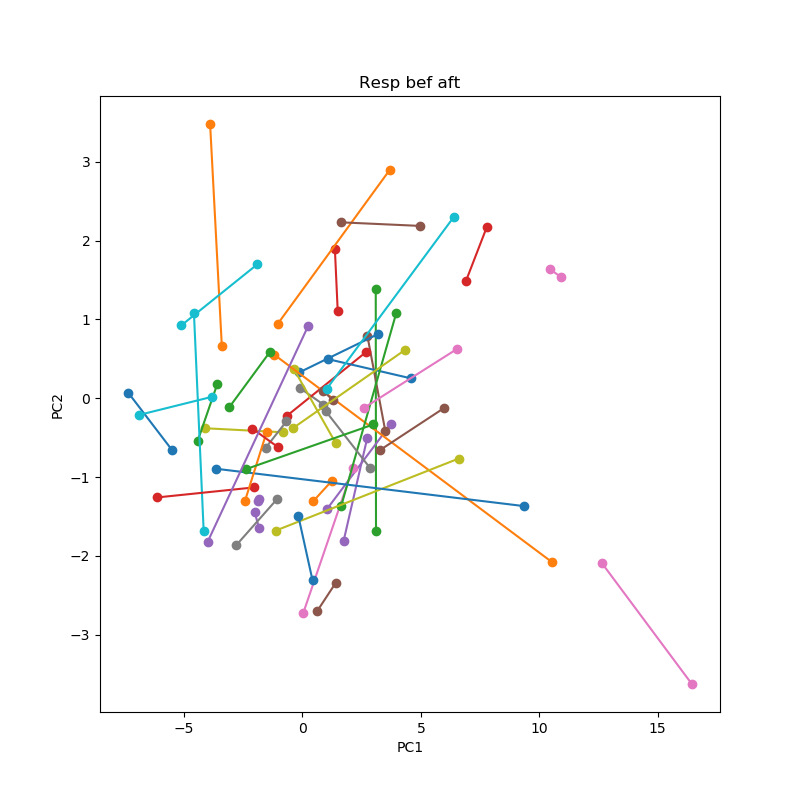

MEAN DISTANCE: 3.0226393597497903


<IPython.core.display.Javascript object>


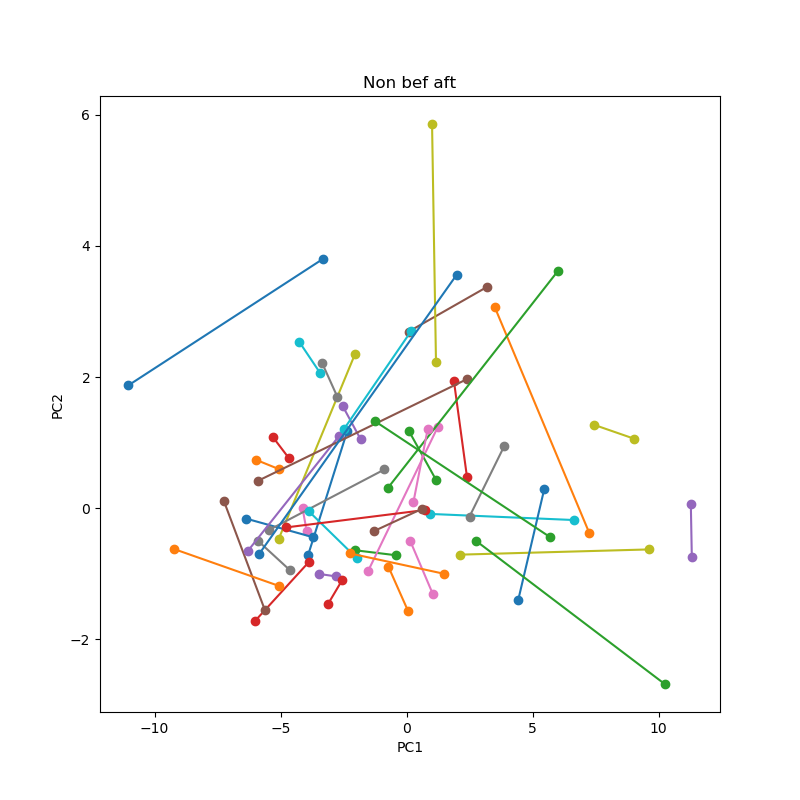

MEAN DISTANCE: 3.204899457951333


In [35]:
# Plot PCA, but same people with the same color

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from math import sqrt

def plot_pca_pairs_2d(df_first, df_second, title=""):
    pca = decomposition.PCA(n_components=2)
    # pca.fit(df_first.append(df_second)[CHANNEL_NAMES])
    pca.fit(df[CHANNEL_NAMES])
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    fig = plt.figure(figsize=(8,8))
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    dists = []
    cmap = plt.get_cmap('gnuplot')
    for i in range(min(len(first), len(second))):
        xs = [first[i, 0], second[i, 0]]
        ys = [first[i, 1], second[i, 1]]
        dists.append(sqrt((first[i,0]-second[i,0])**2 + (first[i,1]-second[i,1])**2))
        # plt.plot(xs, ys, 'o-', color=cmap())
        plt.plot(xs, ys, 'o-')
    print("MEAN DISTANCE: {}".format(sum(dists)/len(dists)))
        
    plt.title(title)
    plt.show()

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

plot_pca_pairs_2d(df_bef, df_aft, title="")
plot_pca_pairs_2d(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :], title='Resp bef aft')
plot_pca_pairs_2d(df_non.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'b'), :], title='Non bef aft')

In [21]:
# For each person, plot their distance between before / after
from math import sqrt

def filter_by_distance(df_first, df_second, n_components=3):
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(df_first.append(df_second)[CHANNEL_NAMES])
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    dists = []
    for fr, sr in zip(first, second):
        dists.append(sqrt(sum([(f-s)**2 for f, s in zip(fr, sr)])))
    perc = np.percentile(dists, 90)
    df = pd.DataFrame()
    for i, (fr, sr) in enumerate(zip(first, second)):
        dist = sqrt(sum([(f-s)**2 for f, s in zip(fr, sr)]))
        if dist > perc:
            df = df.append(df_first.iloc[i, :]) 
    print(df.loc[:, ['resp', 'age', 'sex', 'sc_bef', 'sc_aft', 'change']])
    

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

filter_by_distance(df_bef, df_aft)
filter_by_distance(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :])
filter_by_distance(df_non.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'b'), :])

     resp   age  sex  sc_bef  sc_aft    change
1     1.0  49.0  0.0    26.0    13.0  2.000000
20    1.0  49.0  0.0    27.0    13.0  2.076923
28    1.0  57.0  1.0    34.0    10.0  3.400000
62    1.0  34.0  0.0    23.0    10.0  2.300000
72    0.0  55.0  0.0    23.0    18.0  1.277778
102   1.0  56.0  1.0    18.0     6.0  3.000000
114   1.0  55.0  0.0    25.0    12.0  2.083333
123   0.0  54.0  1.0    24.0    25.0  0.960000
124   0.0  52.0  0.0    30.0    23.0  1.304348
127   0.0  35.0  0.0    25.0    21.0  1.190476
129   1.0  38.0  0.0    27.0     6.0  4.500000
          resp   age  sex  sc_bef  sc_aft    change
(62, a)    1.0  34.0  0.0    23.0    10.0  2.300000
(102, a)   1.0  56.0  1.0    18.0     6.0  3.000000
(114, a)   1.0  55.0  0.0    25.0    12.0  2.083333
(129, a)   1.0  38.0  0.0    27.0     6.0  4.500000
          resp   age  sex  sc_bef  sc_aft    change
(72, a)    0.0  55.0  0.0    23.0    18.0  1.277778
(123, a)   0.0  54.0  1.0    24.0    25.0  0.960000
(124, a)   0.0  52.0